In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk',font_scale=1.4)
%matplotlib inline
import argparse
import os
import warnings
warnings.filterwarnings("ignore")

In [53]:
#Read the csv file
financeData = pd.read_csv("data//TDashboardData_financials_20150101-20161231.csv")

In [54]:
parser = argparse.ArgumentParser(description='Process some characters.')
parser.add_argument("tag",help="ENTER THE DATE IN 'Month-Year' (JUN-2015) format: ")
args = parser.parse_args()
RepDateInput = args.tag

usage: __main__.py [-h] tag
__main__.py: error: unrecognized arguments: -f


SystemExit: 2

To exit: use 'exit', 'quit', or Ctrl-D.


In [55]:
#Delete the unwanted columns
del financeData['Year to Date Actual Amount']
del financeData['Year to Date Budgeted Amount']

In [56]:
RepDateInput = 'JUN-2015'

In [57]:
#Filtering out revenue & expense categories
financeData = financeData[financeData.Category.str.contains('Expenses') | financeData.Category.str.contains('Revenue')]

In [58]:
#Chaning the date format
financeData['Reporting Date'] = financeData['Reporting Date'].str[3:]

In [59]:
if not os.path.exists('Analysis_4') :
    os.mkdir('Analysis_4', 755 )
financeData.to_csv("Analysis_4//Analysis_4_part1.csv",index=False)

In [60]:
#Get expenses & revenue
expenses = financeData[(financeData['Reporting Date']==RepDateInput) & (financeData['Category']=='Expenses')]
revenue = financeData[(financeData['Reporting Date']==RepDateInput) & (financeData['Category']=='Revenue')]
expenses['Month to Date Budgeted Amount'] = expenses['Month to Date Budgeted Amount'].astype(float).fillna(0.0)
revenue['Month to Date Budgeted Amount'] = revenue['Month to Date Budgeted Amount'].astype(float).fillna(0.0)

In [65]:
# Data to plot
labels = expenses.Subcategory.tolist()
sizes = expenses['Month to Date Budgeted Amount'].tolist()
colors = ['yellowgreen', 'green']
explode = [0,0.1]

In [66]:
labels1 = revenue.Subcategory.tolist()
sizes1 = revenue['Month to Date Budgeted Amount'].tolist()

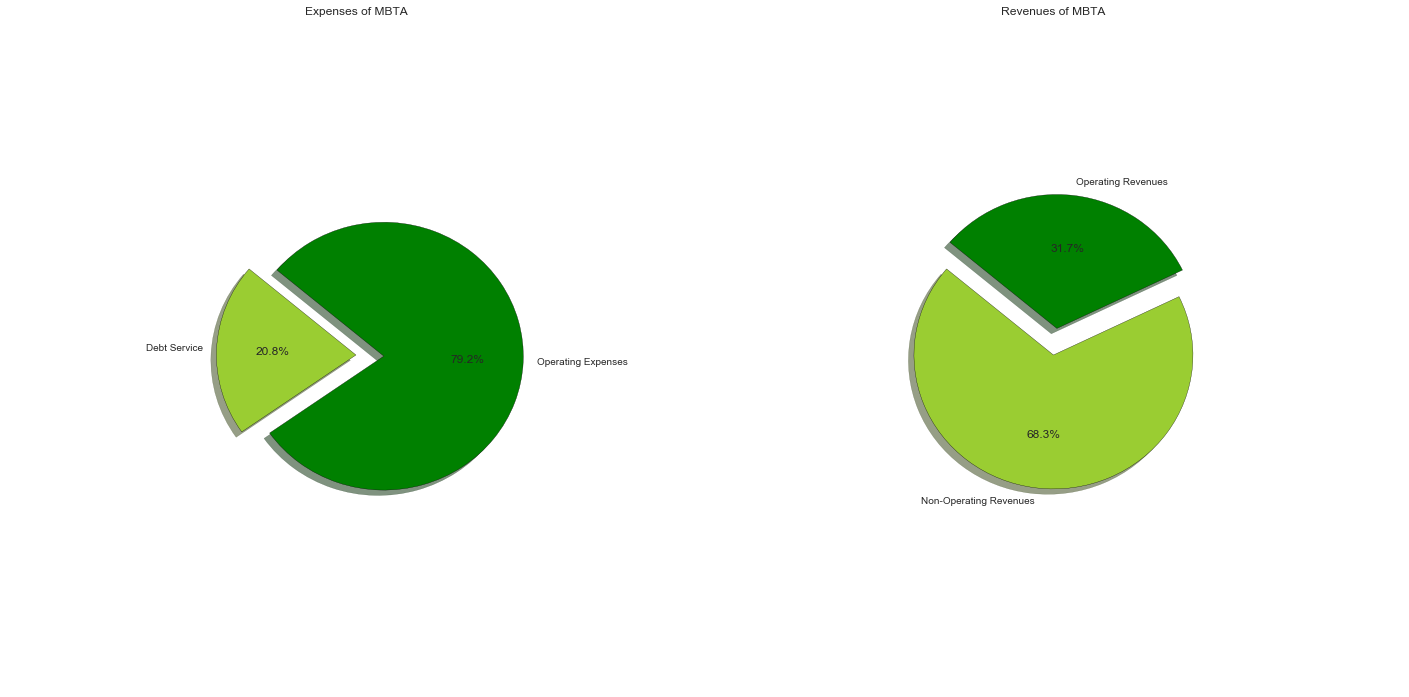

In [72]:
#Create figure and axis
fg,ax = plt.subplots(1,2,figsize=(25,12),sharex=True)
ax[0].pie(sizes, labels=labels, colors=colors, shadow=True, explode=explode, autopct='%1.1f%%', startangle=140, radius=0.50)
ax[0].set_title('Expenses of MBTA')
ax[1].pie(sizes1, labels=labels1, colors=colors, shadow=True, explode=explode, autopct='%1.1f%%', startangle=140, radius=0.50)
ax[1].set_title('Revenues of MBTA')
plt.subplots_adjust(wspace=0, hspace=0)
plt.savefig("Analysis_4/Analysis_4_part1.jpg", bbox_inches='tight')
plt.show()

In [69]:
spending = financeData[(financeData['Reporting Date']==RepDateInput)]
spendingdf = spending.groupby('Category')['Month to Date Actual Amount','Month to Date Budgeted Amount'].sum()
spendingdf = pd.DataFrame(spendingdf.stack())
spendingdf = spendingdf.reset_index()
spendingdf.columns = ['Category', 'Type', 'Amount']
spendingdf.to_csv("Analysis_4//Analysis_4_part2.csv",index=False)

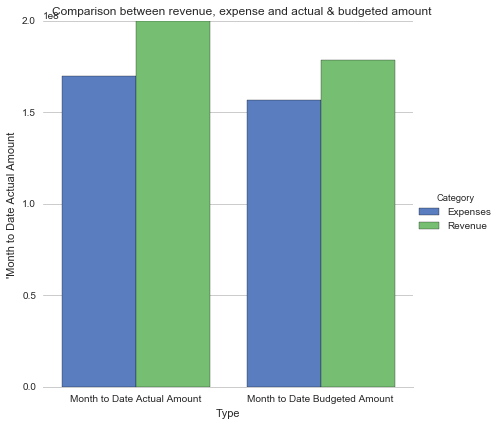

In [71]:
sns.set(style="whitegrid")

g = sns.factorplot(x="Type", y="Amount", hue="Category", data=spendingdf, size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("'Month to Date Actual Amount")
g.fig.suptitle("Comparison between revenue, expense and actual & budgeted amount")
g.savefig("Analysis_4/Analysis_4_part2.jpg", bbox_inches='tight')